# Data Preprocessing

In [2]:
import re
from math import sqrt

In [3]:
#x = open('feature_name_preprocessing.txt' , 'r')
x = open('feature_name_original.txt' , 'r')
# open feature name file and extract them.
# file has every feature name even i had removed, i just remove '@' characteristic from them.
# then using module regex to find meaningful variables.
feature_names = []
for line in x :
    pattern = re.compile(r'(@attribute) ([\S]+)')
    tmp = re.search(pattern, line)
    if (tmp) != None :
        feature_names.append(tmp.group(2))
print(feature_names)
len(feature_names)
# meaningful variable is 103 because first 5 var(communityname~fold) is non-predictive so I don't use them.

['communityname', 'State', 'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'AsianPerCap', 'otherPerCap', 'HispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLa

108

In [4]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
#book = xlrd.open_workbook('data_preprocessing.xlsx')
book = xlrd.open_workbook('data_original.xlsx')
sheet = book.sheet_by_index(0)
#start of 5 because i dont' use first 5 data(above mention it)
feature_index = [i for i in range(5,len(feature_names))]
data = []
for i in range(1, sheet.nrows):
    tmp = []
    for idx in feature_index:
        x = sheet.row_values(i)[idx]
        tmp.append(0 if x =='?' else x) # exception handling for independent variables. this data set just 1 instances founded. 
    # In very little case, dependent variables which we want to estimate has missing value
    # So I except that cases
    if(sheet.row_values(i)[len(feature_names)-1] != '?' and sheet.row_values(i)[len(feature_names)-2] != '?' ) :
        data.append(tmp)
#print(data)


## Test by just given variables

In [6]:
# this dataframe hold every attributes
# 108 - 5(nonpredictive) -1(sum as crime per pop) = 102

df = pd.DataFrame(data, columns=feature_names[5:])
df['crimePerPop'] = df['violentPerPop'] + df['nonViolPerPop']
df = df.drop(['violentPerPop', 'nonViolPerPop'], axis = 1)
len(df.columns)

102

# if you re - running code, starting from here
# and sometimes you have to delete dataframe using underline

In [ ]:
#del df2, df3

In [8]:

X = df[list(df.columns)[0:-1]]
y = df[list(df.columns)[-1:]]

# scaler for normalization
X_norm = MinMaxScaler().fit_transform(X)
y_norm = MinMaxScaler().fit_transform(y)

# cross validation for prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1331, 101)
(571, 101)


# LinearRegression Part

In [9]:
model = LR(fit_intercept=True, normalize=True, n_jobs=None)
model.fit(X_train, y_train)

p = len(df.columns) - 1 # number of features
n = len(data) # number of sample
accuracy = model.score(X_test, y_test)
train_accuracy = model.score(X_train, y_train)
train_adj_r =  1- (1-train_accuracy)*(n-1)/(n-p-1)
adj_r = 1- (1-accuracy)*(n-1)/(n-p-1)  # adjusted r2 score 
print("train R2_score    :", str(train_accuracy))
print("train adj R2_score:", train_adj_r)
print("test R2_score    :", str(accuracy))
print("test adj R2_score:", adj_r)
model.coef_

train R2_score    : 0.6395330516856352
train adj R2_score: 0.6193068506968848
test R2_score    : 0.604789488718495
test adj R2_score: 0.5826137878076995


array([[ 4.15889506e+00, -1.86824253e-01,  2.39127249e-01,
         1.80027090e-01,  1.33040973e-01,  5.12624372e-02,
         1.86071492e-01, -5.94348980e-02, -1.78244365e-01,
         1.96823269e-01, -5.35133097e+00,  2.92814255e-02,
        -2.64290106e-01,  4.70222635e-02,  1.36553240e-02,
         3.26499402e-02,  2.48032406e-01,  2.71822296e-02,
        -1.32443688e-01,  2.53888878e-01, -2.49188214e-01,
         2.95412475e-01, -6.30616453e-02,  3.18644183e-02,
        -1.40388477e-02,  4.75776020e-02,  9.87558624e-03,
         1.41499493e+00,  3.25916582e-02, -6.65751594e-02,
        -7.71144489e-02, -4.50396022e-02,  5.13876671e-02,
         2.16394070e-01, -3.57240520e-02, -3.16874064e-02,
         2.57720300e-02,  5.57491056e-02,  3.84715545e-01,
         2.33913897e-01,  3.32034792e-01, -4.55210431e-01,
        -1.04133636e-02,  8.64223470e-02, -2.14092863e-01,
         3.97536466e-02, -1.36321413e-03, -2.68846705e-02,
        -7.10028462e-02, -1.06688091e+00,  1.08968939e-0

In [10]:
print(X.columns)
coefs = pd.DataFrame(zip(X.columns,model.coef_[0]),columns=['features','coefficients'])
coefs.reindex(coefs.coefficients.sort_values(ascending=False).index)

Index(['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp',
       'pct12-21', 'pct12-29', 'pct16-24', 'pct65up',
       ...
       'persEmergShelt', 'persHomeless', 'pctForeignBorn', 'pctBornStateResid',
       'pctSameHouse-5', 'pctSameCounty-5', 'pctSameState-5', 'landArea',
       'popDensity', 'pctUsePubTrans'],
      dtype='object', length=101)


,features,coefficients
79,ownHousLowQ,1.317298e+12
82,ownHousQrange,9.003195e+11
85,rentUpperQ,7.230854e+11
0,pop,4.158895e+00
27,persPoverty,1.414995e+00
73,pctHousOwnerOccup,8.866869e-01
91,persEmergShelt,5.193407e-01
71,houseVacant,3.889758e-01
38,pctMaleDivorc,3.847155e-01
40,pctFemDivorc,3.320348e-01


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

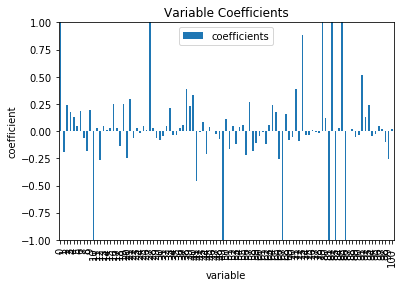

In [11]:
coefs.plot(kind='bar', title ='Variable Coefficients')
plt.xlabel('variable')
plt.ylabel('coefficient')
plt.ylim(-1,1)
plt.xticks(rotation=90)

0.06229777720669195


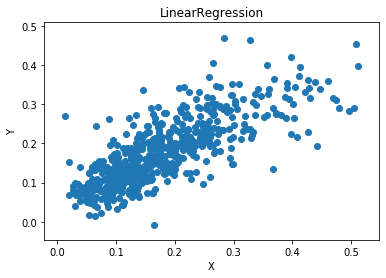

In [12]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LinearRegression")
rmse = sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(rmse)

# RidgeRegression Part

In [13]:
from sklearn.linear_model import Ridge
rR = Ridge(alpha=0.01, normalize=True)
rR.fit(X_train, y_train)

p = len(df.columns) - 1 # number of features
n = len(data) # number of sample

accuracy = rR.score(X_test, y_test)
train_accuracy = rR.score(X_train, y_train)
train_adj_r =  1- (1-train_accuracy)*(n-1)/(n-p-1)
adj_r = 1- (1-accuracy)*(n-1)/(n-p-1)  # adjusted r2 score 
print("train R2_score    :", str(train_accuracy))
print("train adj R2_score:", train_adj_r)
print("test R2_score    :", str(accuracy))
print("test adj R2_score:", adj_r)
rR.coef_

train R2_score    : 0.6334747544059616
train adj R2_score: 0.6129086156254072
test R2_score    : 0.6099975128333593
test adj R2_score: 0.5881140399423423


array([[-0.22552631, -0.13969802,  0.14589354,  0.06812102,  0.06010788,
         0.03692585,  0.05863458, -0.11707417,  0.01611758,  0.13998643,
        -0.3913565 ,  0.014775  ,  0.00226824,  0.02615741, -0.01013435,
         0.03470109,  0.19514668,  0.02537059, -0.11733353, -0.00094172,
        -0.05059183,  0.10726271, -0.09489969,  0.03093927, -0.01425091,
         0.05824251,  0.02256448,  0.42915634,  0.05987359, -0.08066987,
        -0.04441809, -0.02992799,  0.01309972,  0.16697055, -0.04173268,
        -0.04208215,  0.01593374,  0.03957084,  0.12052168,  0.18425456,
         0.0235003 ,  0.03227896,  0.04214562,  0.00257583, -0.11283524,
         0.02102731, -0.01386192, -0.03338595, -0.04892843, -0.46611971,
         0.10439392, -0.09500884,  0.02757889, -0.07142353,  0.01301455,
         0.05576479, -0.07379096, -0.01546785, -0.05694785, -0.01336095,
        -0.05980585,  0.01563462, -0.00419763, -0.00285059,  0.22390163,
        -0.11660287, -0.0287199 , -0.11548718,  0.0

In [14]:
print(X.columns)
coefs = pd.DataFrame(zip(X.columns,rR.coef_[0]),columns=['features','coefficients'])
coefs.reindex(coefs.coefficients.sort_values(ascending=False).index)

Index(['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp',
       'pct12-21', 'pct12-29', 'pct16-24', 'pct65up',
       ...
       'persEmergShelt', 'persHomeless', 'pctForeignBorn', 'pctBornStateResid',
       'pctSameHouse-5', 'pctSameCounty-5', 'pctSameState-5', 'landArea',
       'popDensity', 'pctUsePubTrans'],
      dtype='object', length=101)


,features,coefficients
27,persPoverty,0.429156
71,houseVacant,0.364251
91,persEmergShelt,0.299847
64,persPerOccupHous,0.223902
16,pctWsocsec,0.195147
39,pctMaleNevMar,0.184255
93,pctForeignBorn,0.173235
33,pctEmploy,0.166971
2,pctBlack,0.145894
9,pct65up,0.139986


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

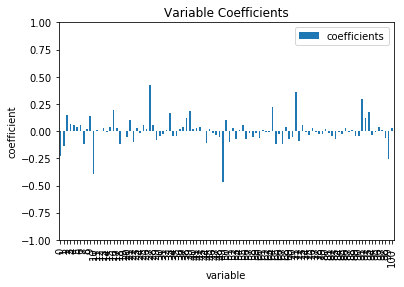

In [15]:
coefs.plot(kind='bar', title ='Variable Coefficients')
plt.xlabel('variable')
plt.ylabel('coefficient')
plt.ylim(-1,1)
plt.xticks(rotation=90)

0.06188594060223607


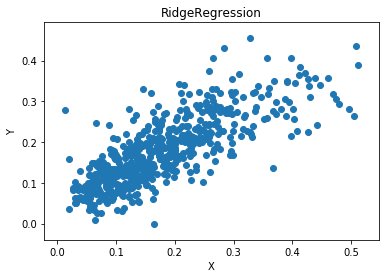

In [16]:
y_pred = rR.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("RidgeRegression")
rmse = sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(rmse)

# LassoRegression part

In [18]:
from sklearn.linear_model import Lasso
lassoR = Lasso(alpha=0.00001, normalize=True)
lassoR.fit(X_train, y_train)
p = len(df.columns) - 1 # number of features
n = len(data) # number of sample
accuracy = lassoR.score(X_test, y_test)
train_accuracy = lassoR.score(X_train, y_train)
train_adj_r =  1- (1-train_accuracy)*(n-1)/(n-p-1)
adj_r = 1- (1-accuracy)*(n-1)/(n-p-1)  # adjusted r2 score 
print("train R2_score    :", str(train_accuracy))
print("train adj R2_score:", train_adj_r)
print("test R2_score    :", str(accuracy))
print("test adj R2_score:", adj_r)
lassoR.coef_

train R2_score    : 0.625049746590861
train adj R2_score: 0.6040108712606815
test R2_score    : 0.6187277523813735
test adj R2_score: 0.5973341429316616


array([-0.        , -0.09771325,  0.08049919,  0.        ,  0.        ,
        0.02007028,  0.        , -0.06409842,  0.        ,  0.08636999,
       -0.05525335,  0.01493782, -0.        , -0.        , -0.00818413,
        0.01456448,  0.17037575,  0.00785524, -0.10388974, -0.        ,
        0.        ,  0.03934216, -0.08980919,  0.01719204, -0.00769954,
        0.05353644,  0.01812869,  0.        ,  0.07536788, -0.06141856,
       -0.04218934, -0.        , -0.        ,  0.14196039, -0.03999412,
       -0.02824281, -0.        ,  0.00242474,  0.13582915,  0.1422048 ,
        0.0213069 ,  0.        ,  0.        , -0.        , -0.1417648 ,
        0.        , -0.00825945, -0.03398952, -0.04030144, -0.13847232,
        0.08672876, -0.        ,  0.0085096 , -0.03531005,  0.        ,
        0.04326692, -0.08633654, -0.01101789, -0.        , -0.        ,
       -0.04484114,  0.        ,  0.00272393,  0.        ,  0.14056209,
       -0.05261078,  0.        , -0.0261734 ,  0.        , -0.04

In [20]:
print(X.columns)
coefs = pd.DataFrame(zip(X.columns,lassoR.coef_),columns=['features','coefficients'])
coefs.reindex(coefs.coefficients.sort_values(ascending=False).index)

Index(['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp',
       'pct12-21', 'pct12-29', 'pct16-24', 'pct65up',
       ...
       'persEmergShelt', 'persHomeless', 'pctForeignBorn', 'pctBornStateResid',
       'pctSameHouse-5', 'pctSameCounty-5', 'pctSameState-5', 'landArea',
       'popDensity', 'pctUsePubTrans'],
      dtype='object', length=101)


,features,coefficients
71,houseVacant,0.247375
16,pctWsocsec,0.170376
93,pctForeignBorn,0.148900
39,pctMaleNevMar,0.142205
33,pctEmploy,0.141960
64,persPerOccupHous,0.140562
38,pctMaleDivorc,0.135829
50,pctKidsBornNevrMarr,0.086729
9,pct65up,0.086370
2,pctBlack,0.080499


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

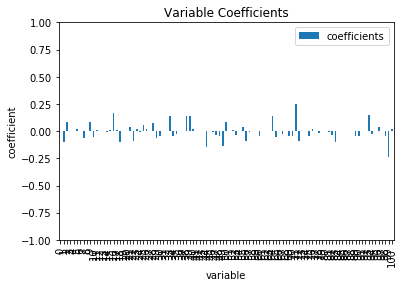

In [21]:
coefs.plot(kind='bar', title ='Variable Coefficients')
plt.xlabel('variable')
plt.ylabel('coefficient')
plt.ylim(-1,1)
plt.xticks(rotation=90)

0.06118935920242044


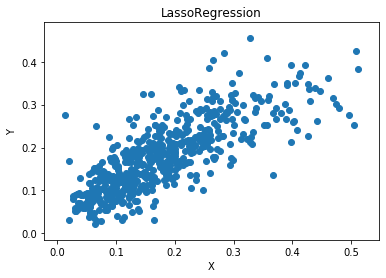

In [22]:
y_pred = lassoR.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LassoRegression")
rmse = sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(rmse)